### Text Data, 
text data is definitely one of the most abundant sources of unstructured data. Text data usually consists of documents which can represent words, sentences or even paragraphs of free flowing text. The inherent unstructured (no neatly formatted data columns!) and noisy nature of textual data makes it harder for machine learning methods to directly work on raw text data.


The importance of feature engineering is even more important for unstructured, textual data because we need to convert free flowing text into some numeric representations which can then be understood by machine learning algorithms


“If you are given a box of tools to repair a house, you should know when to use a power drill and when to use a hammer!”.

# The Problem with Text
A problem with modeling text is that it is messy, and techniques like machine learning algorithms prefer well defined fixed-length inputs and outputs.

Machine learning algorithms cannot work with raw text directly; the text must be converted into numbers. Specifically, vectors of numbers.

In language processing, the vectors x are derived from textual data, in order to reflect various linguistic properties of the text.



This is called feature extraction or feature encoding.

A popular and simple method of feature extraction with text data is called the bag-of-words model of text.



# What is a Bag-of-Words?
A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

A vocabulary of known words.
A measure of the presence of known words.
It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

"A very common feature extraction procedures for sentences and documents is the bag-of-words approach (BOW). In this approach, we look at the histogram of the words within the text, i.e. considering each word count as a feature."

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = None
%matplotlib inline

In [2]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          "A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
          'I love green eggs, ham, sausages and bacon!',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals', 'weather', 'animals']

df = pd.DataFrame({'Document':corpus, 'label':labels})
df

,Document,label
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


### Preprocessing
Removing Extra Space  

Removing special characters 

Ignoring case
Ignoring punctuation

Ignoring frequent words that don’t contain much information, called stop words, like “a,” “of,” etc.

Fixing misspelled words.
Reducing words to their stem (e.g. “play” from “playing”) using stemming algorithms.


In [3]:
wpt = nltk.WordPunctTokenizer()
# nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
#     print(doc)
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()  #lower case
    doc = doc.strip()  #white space 
    # tokenize document
    tokens = wpt.tokenize(doc)
    
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
#     print(filtered_tokens)
    doc = ' '.join(filtered_tokens)
    return doc



In [4]:
# Once we have our basic pre-processing pipeline ready, let’s apply the same to our sample corpus.
normalize_corpus = np.vectorize(normalize_document)(corpus)
normalize_corpus

array(['sky blue beautiful', 'love blue beautiful sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast beans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U51')

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(normalize_corpus)
cv_matrix=cv_matrix.todense()
vocabulary = cv.get_feature_names()

cv_df = pd.DataFrame(cv_matrix, columns=vocabulary)
cv_df

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


###  Bags of N gram Model
An N-gram is basically a collection of word tokens from a text document such that these tokens are contiguous and occur in a sequence. Bi-grams indicate n-grams of order 2 (two words), Tri-grams indicate n-grams of order 3 (three words), and so on. The Bag of N-Grams model is hence just an extension of the Bag of Words model so we can also leverage N-gram based features

In [52]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(normalize_corpus)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
bv_df = pd.DataFrame(bv_matrix, columns=vocab)
bv_df


,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Model

TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

See below for a simple example.

Example:

Consider a document containing 100 words wherein the word cat appears 3 times. The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(normalize_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
tv_df=pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)
tv_df

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


### Document Similarity
Document similarity is the process of using a distance or similarity based metric that can be used to identify how similar a text document is with any other document(s) based on features extracted from the documents like bag of words or tf-idf.

Pairwise document similarity in a corpus involves computing document similarity for each pair of documents in a corpus. Thus if you have C documents in a corpus, you would end up with a C x C matrix such that each row and column represents the similarity score for a pair of documents, which represent the indices at the row and column, respectively.

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


Cosine similarity basically gives us a metric representing the cosine of the angle between the feature vector representations of two text documents. Lower the angle between the documents, the closer and more similar they are.


Looking closely at the similarity matrix clearly tells us that documents (0, 1 and 6), (2, 5 and 7) are very similar to one another and documents 3 and 4 are slightly similar to each other but the magnitude is not very strong, however still stronger than the other documents. This must indicate these similar documents have some similar features. This is a perfect example of grouping or clustering that can be solved by unsupervised learning especially when you are dealing with huge corpora of millions of text documents.

### Document Clustering with Similarity Features
Clustering leverages unsupervised learning to group data points (documents in this scenario) into groups or clusters. We will be leveraging an unsupervised hierarchical clustering algorithm here to try and group similar documents from our toy corpus together by leveraging the document similarity features we generated earlier.

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix, 'ward')
Z_df = pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')
Z_df

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2,7,0.253098,2
1,0,6,0.308539,2
2,5,8,0.386952,3
3,1,9,0.489845,3
4,3,4,0.732945,2
5,11,12,2.69565,5
6,10,13,3.45108,8


If you closely look at the linkage matrix, you can see that each step (row) of the linkage matrix tells us which data points (or clusters) were merged together. If you have n data points, the linkage matrix, Z will be having a shape of (n — 1) x 4 where Z[i] will tell us which clusters were merged at step i. Each row has four elements, the first two elements are either data point identifiers or cluster labels (in the later parts of the matrix once
multiple data points are merged), the third element is the cluster distance between the first two elements (either data points or clusters), and the last element is the total number of elements\data points in the cluster once the merge is complete.

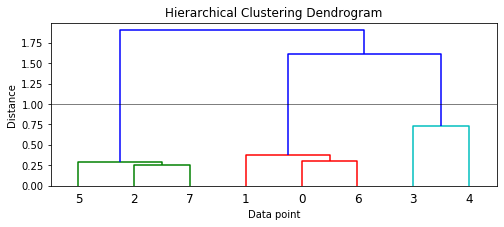

In [22]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dn = dendrogram(Z)
plt.axhline(y=1.0, color='k', ls='-', lw=0.5)


In [39]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0
cl_label = fcluster(Z, max_dist, criterion='distance')
cl_label_df = pd.DataFrame(cl_label, columns=['Cluster_label'])
pd.concat([df,cl_label_df],axis=1)


,Document,label,Cluster_label
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,3
4,"I love green eggs, ham, sausages and bacon!",food,3
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


### Topic Models
We can also use some summarization techniques to extract topic or concept based features from text documents. The idea of topic models revolves around the process of extracting key themes or concepts from a corpus of documents which are represented as topics. Each topic can be represented as a bag or collection of words/terms from the document corpus. Together, these terms signify a specific topic, theme or a concept and each topic can be easily distinguished from other topics by virtue of the semantic meaning conveyed by these terms. However often you do end up with overlapping topics based on the data. These concepts can range from simple facts and statements to opinions and outlook. Topic models are extremely useful in summarizing large corpus of text documents to extract and depict key concepts. They are also useful in extracting features from text data that capture latent patterns in the data.

For the purpose of feature engineering which is the intent of this article, you need to remember that when LDA is applied on a document-term matrix (TF-IDF or Bag of Words feature matrix), it gets decomposed into two main components.
A document-topic matrix, which would be the feature matrix we
are looking for.
A topic-term matrix, which helps us in looking at potential topics in the corpus.

### Document - Topic Matrix

In [75]:

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)
features_matrix = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features_matrix

,T1,T2,T3
0,0.832191,0.083480,0.084329
1,0.863554,0.069100,0.067346
2,0.047794,0.047776,0.904430
3,0.037243,0.925559,0.037198
4,0.049121,0.903076,0.047802
5,0.054902,0.047778,0.897321
6,0.888287,0.055697,0.056016
7,0.055704,0.055689,0.888607


### Topic Term Matrix

In [73]:
topic_term_matrix = lda.components_


for topic_weights in topic_term_matrix:

    topic = [(token, weight) for token, weight in zip(vocabulary, topic_weights)]  # list of tuple (token and associated weight)
    topic = sorted(topic, key=lambda x:x[1], reverse=True)  #or -x[1]
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()


[('sky', 4.3324394424701325), ('blue', 3.373774254787669), ('beautiful', 3.3323650509884386), ('today', 1.3325579855138987), ('love', 1.330415818217548)]

[('bacon', 2.33269586574902), ('eggs', 2.33269586574902), ('ham', 2.33269586574902), ('sausages', 2.33269586574902), ('love', 1.3354610533796556), ('beans', 1.3327735190105536), ('breakfast', 1.3327735190105536), ('kings', 1.3327735190105536), ('toast', 1.3327735190105536), ('green', 1.3325431515674175)]

[('brown', 3.3323473548404405), ('dog', 3.3323473548404405), ('fox', 3.3323473548404405), ('lazy', 3.3323473548404405), ('quick', 3.3323473548404405), ('jumps', 1.3324193772908193), ('blue', 1.2919423137963386)]



hus you can clearly see the three topics are quite distinguishable from each other based on their constituent terms, first one talking about weather, second one about food and the last one about animals. Choosing the number of topics for topic modeling is an entire topic on its own (pun not intended!) and is an art as well as a science.

# Document Clustering with Topic Model Features[Document_Topic Matrix]
We used our Bag of Words model based features to build out topic model based features using LDA. We can now actually leverage the document term matrix we obtained and use an unsupervised clustering algorithm to try and group our documents similar to what we did earlier with our similarity features.


We will use a very popular partition based clustering method this time, K-means clustering to cluster or group these documents based on their topic model feature representations. In K-means clustering, we have an input parameter k, which specifies the number of clusters it will output using the document features.

In [83]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(features_matrix)
cluster_labels=kmeans.labels_
cluster_center = kmeans.cluster_centers_
cluster_labels_df = pd.DataFrame(cluster_labels, columns=['Cluster Label'])
pd.concat([df,cluster_labels_df],axis=1)

,Document,label,Cluster Label
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,0
4,"I love green eggs, ham, sausages and bacon!",food,0
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1
